In [22]:
#!/usr/bin/env python3

import numpy as np
from PIL import Image
from IPython import display
from matplotlib.pyplot import imshow

with open('rewards.txt','r') as f:
    rewardLines = f.readlines()
with open('prob_a1.txt','r') as f:
    westLines = f.readlines()
with open('prob_a2.txt','r') as f:
    northLines = f.readlines()
with open('prob_a3.txt','r') as f:
    eastLines = f.readlines()
with open('prob_a4.txt','r') as f:
    southLines = f.readlines()

def extractIntData(dataLines):
    dataString = [line.split() for line in dataLines]
    dataNum = [list(map(int, line)) for line in dataString]
    return np.array(dataNum)

def loadTransitionMat(tranLines, numStates=81):
    tranMat = np.zeros((numStates, numStates))
    for line in tranLines:
        data = line.split()
        tranMat[int(data[0])-1, int(data[1])-1] = float(data[2])
    return tranMat

def visualization(states):
    im = Image.open("mazePlain.jpg")
    imArr = Image.open("arrow.png")
    for i in range(9):
        for j in range(9):
            loc = (j*178 + 89, i*178 + 89)
            curState = int(states[i+9*j])
            if(curState == 0):
                im.paste(imArr.rotate(180),loc) #west
            elif(curState == 1):
                im.paste(imArr.rotate(90),loc) #north
            elif(curState == 2):
                im.paste(imArr,loc) #east
            else:
                im.paste(imArr.rotate(270),loc)#south\
    im.save('result.jpg')
    display.display(display.Image(filename='result.jpg'))
    
numStates = 81
numIterations = 300
discount = 0.9925

rewards = extractIntData(rewardLines)
westMat = loadTransitionMat(westLines)
northMat = loadTransitionMat(northLines)
eastMat = loadTransitionMat(eastLines)
southMat = loadTransitionMat(southLines)
tranMat = [westMat, northMat, eastMat, southMat]    

hw8


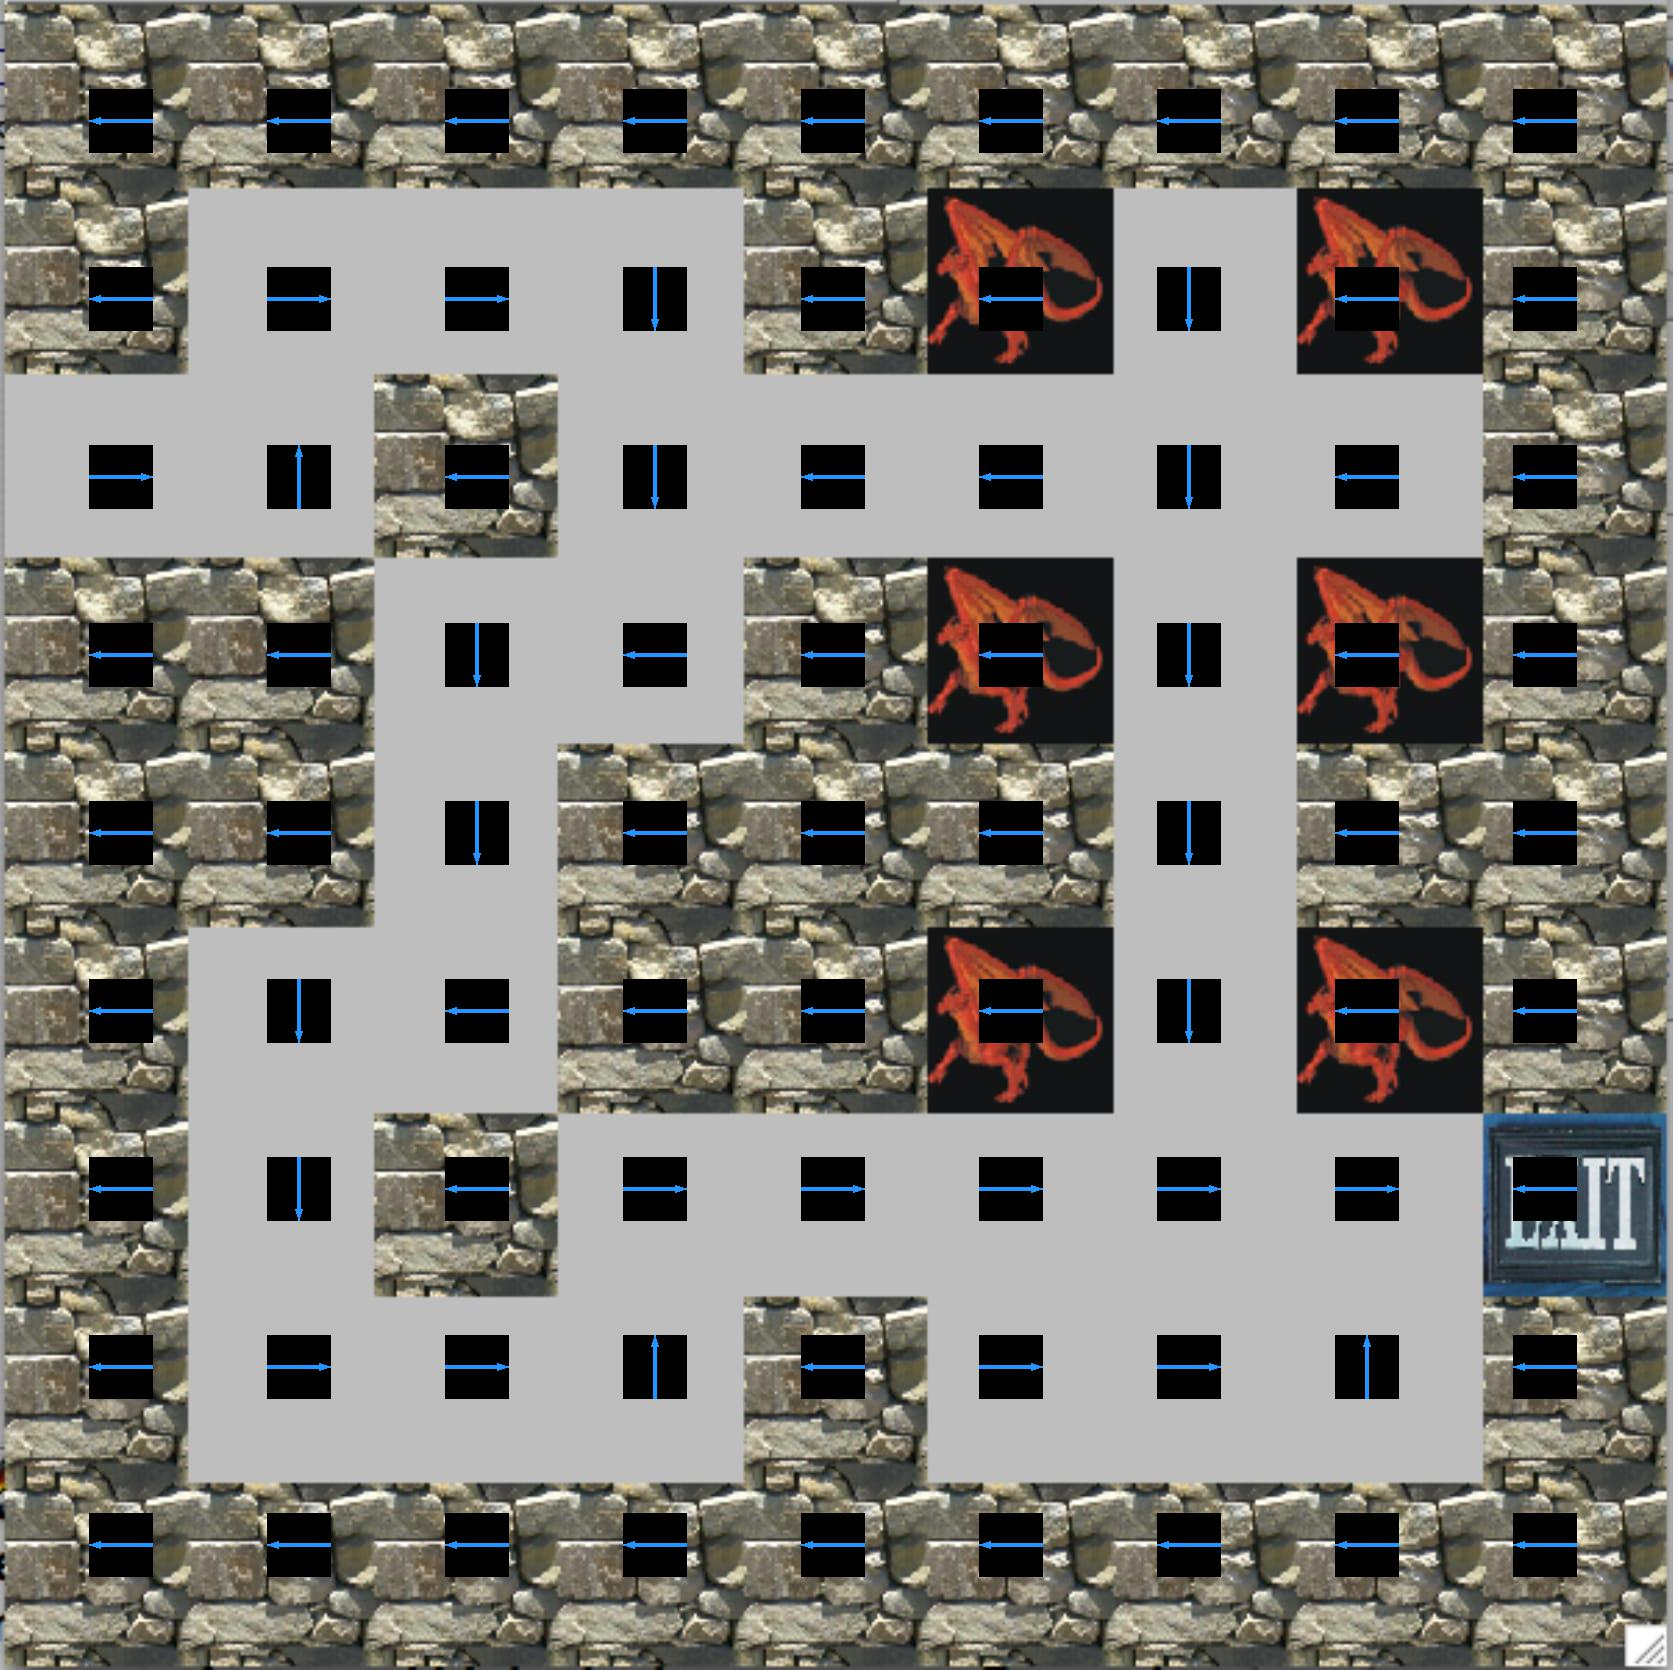

In [23]:
#policy iteration

states = np.random.randint(4,size=numStates)
values = np.zeros(numStates)

for iter in range(numIterations):
    P = np.zeros((numStates,numStates))
    for i in range(numStates):
        P[i] = tranMat[int(states[i])][i]
    values = np.dot(np.linalg.inv(np.eye(numStates) - discount * P), rewards)
    states = np.argmax(np.array([np.dot(tranMat[0],values), np.dot(tranMat[1],values), np.dot(tranMat[2],values), np.dot(tranMat[3],values)]),axis=0)

visualization(states)

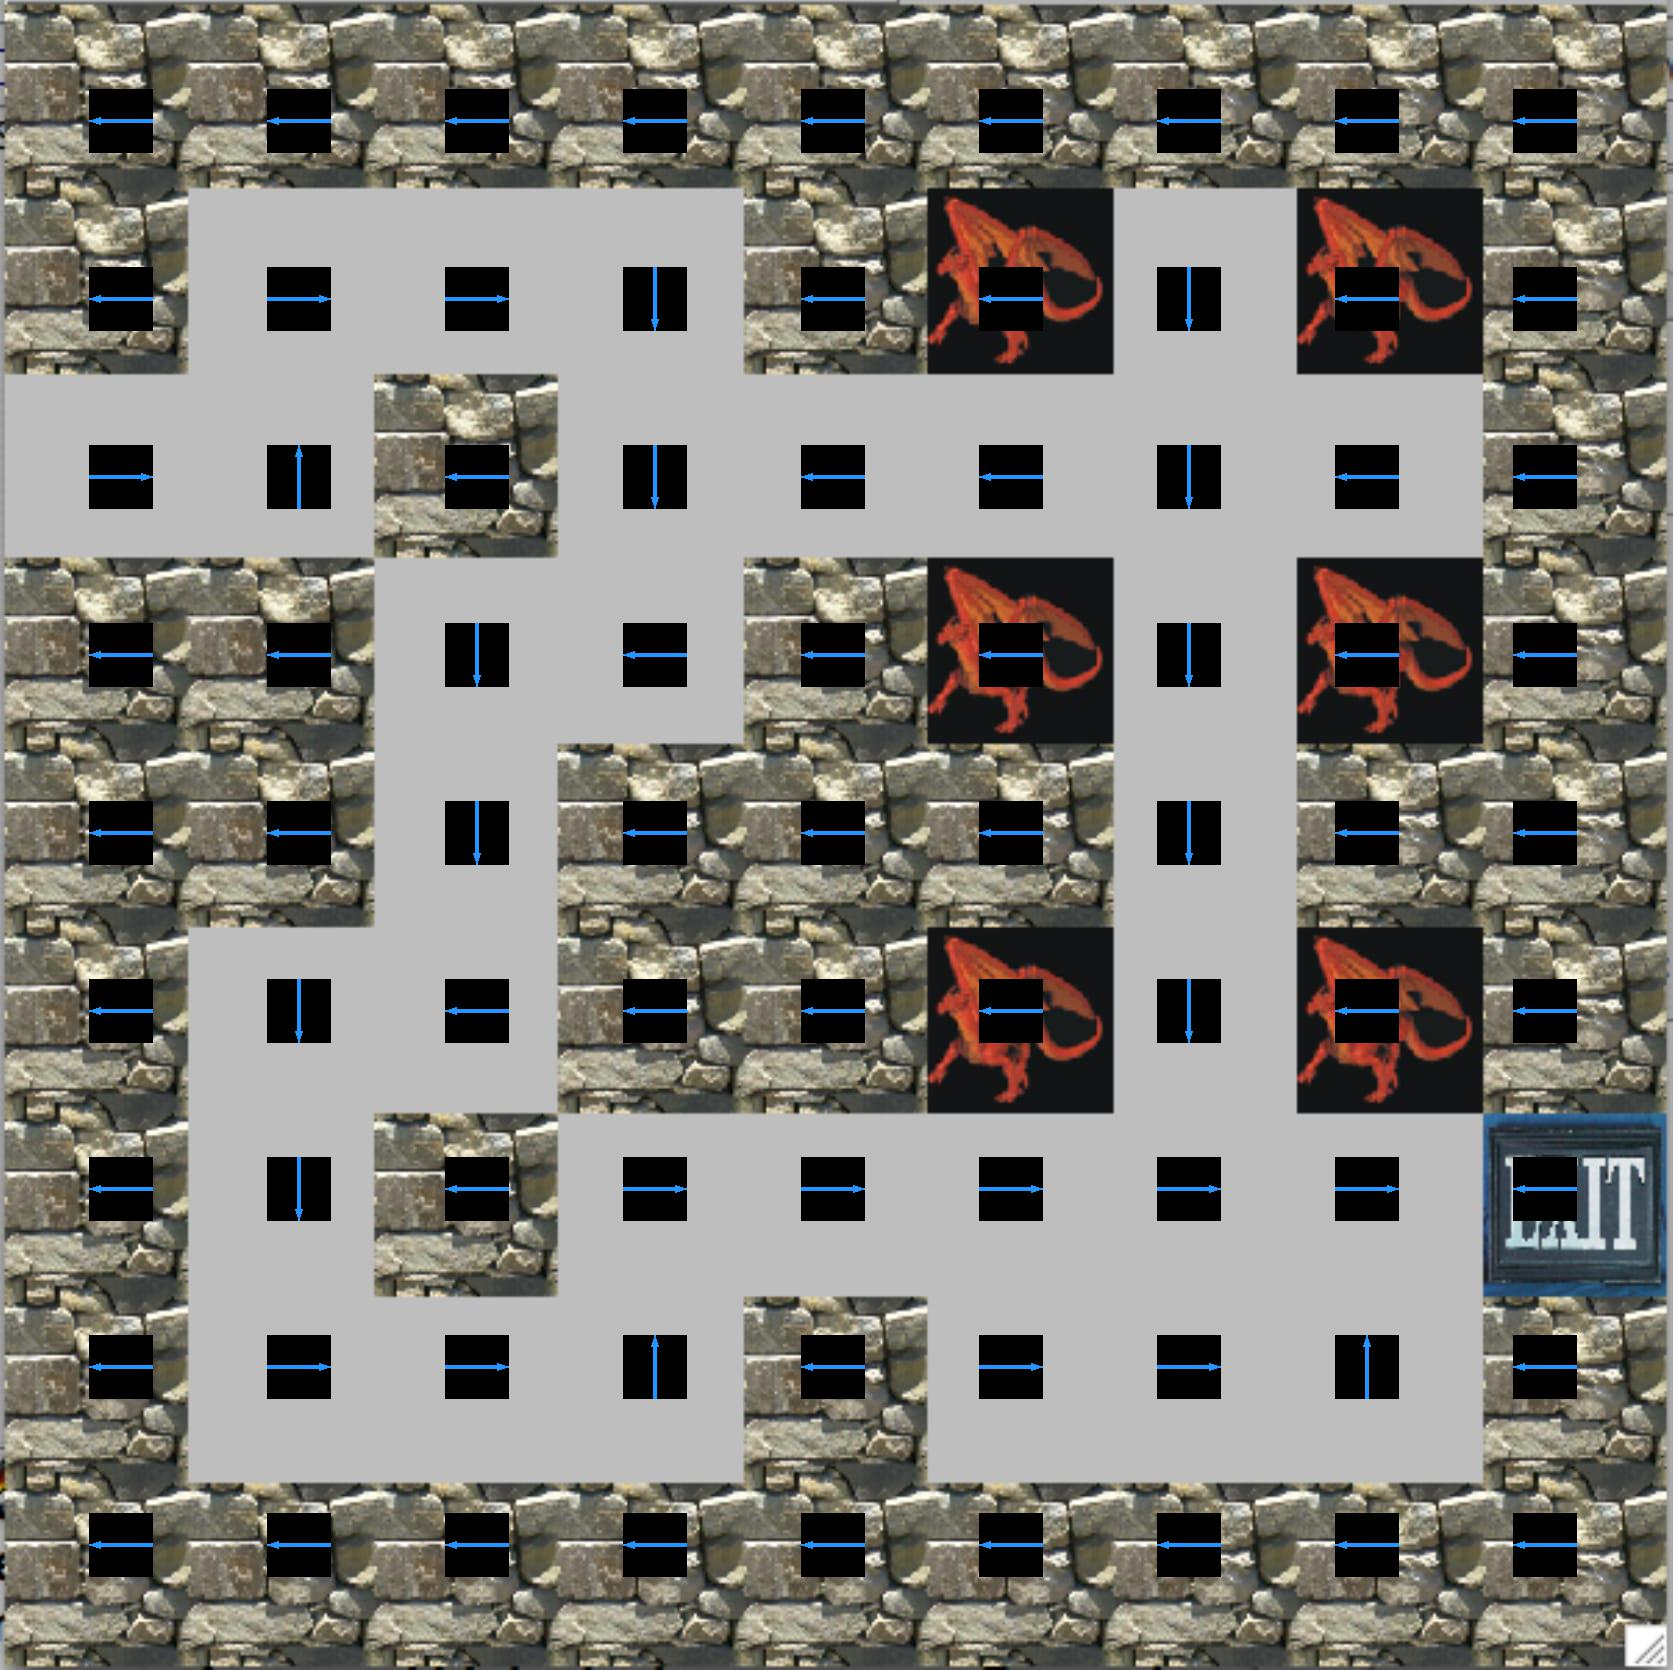

In [24]:
#value iteration

states = np.zeros(numStates)
values = np.zeros(numStates)

for iter in range(numIterations):
    states = np.argmax(np.array([np.dot(tranMat[0],values), np.dot(tranMat[1],values), np.dot(tranMat[2],values), np.dot(tranMat[3],values)]),axis=0)
    for i in range(numStates):
        values[i] = rewards[i] + discount * np.sum(tranMat[int(states[i])][i] * values)

visualization(states)